<a href="https://colab.research.google.com/github/PinkyChaudhary00/Semotions/blob/main/Xception_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Activation, Convolution2D, Dropout, Conv2D
from keras.layers import AveragePooling2D, BatchNormalization
from keras.layers import GlobalAveragePooling2D
from keras.models import Sequential
from keras.layers import Flatten
from keras.models import Model
from keras.layers import Input
from keras.layers import MaxPooling2D
from keras.layers import SeparableConv2D
from keras import layers
from keras.regularizers import l2
from keras.callbacks import CSVLogger, ModelCheckpoint, EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
dataset_path = '/content/drive/MyDrive/fer2013/fer2013.csv'

def load_fer2013(dataset_path):
        data = pd.read_csv(dataset_path)
        pixels = data['pixels'].tolist()
        width, height = 48, 48
        faces = []
        for pixel_sequence in pixels:
            face = [int(pixel) for pixel in pixel_sequence.split(' ')]
            face = np.asarray(face).reshape(width, height)
            face = cv2.resize(face.astype('float32'),(100,100))
            face = cv2.cvtColor(face,cv2.COLOR_GRAY2RGB)
            faces.append(face)
        faces = np.asarray(faces)
        emotions = pd.get_dummies(data['emotion']).to_numpy()
        return faces, emotions
        
faces,emotions = load_fer2013(dataset_path)

In [ ]:
def split_data(x, y):
    num_samples = len(x)
    num_train_samples = int(0.8*num_samples)
    train_x = x[:num_train_samples]
    train_y = y[:num_train_samples]
    val_x = x[num_train_samples:]
    val_y = y[num_train_samples:]
    train_data = (train_x, train_y)
    val_data = (val_x, val_y)
    return train_data, val_data
train_data, val_data = split_data(faces, emotions)

In [ ]:
# Load data sets
(X_train, y_train), (X_test, y_test) = train_data,val_data
print(X_train.shape)
print(X_test.shape)

(28709, 100, 100, 3)
(7178, 100, 100, 3)


In [ ]:
# Define Image Data Generator for training set
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=5,
                                   shear_range=0.1,
                                   zoom_range=0.2, 
                                   horizontal_flip=True)

# Define Image Generator for test set
test_datagen = ImageDataGenerator(rescale=1./255)

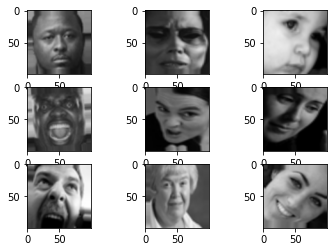

In [ ]:
for X_batch, y_batch in train_datagen.flow(X_train, y_train, batch_size=9, seed=42):
    # create a grid of 3x3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i])
    # show the plot
    plt.show()
    break	

In [ ]:
def tiny_XCEPTION(input_shape, num_classes, l2_regularization=0.01):
    regularization = l2(l2_regularization)

    # base
    img_input = Input(input_shape)
    x = Conv2D(5, (3, 3), strides=(1, 1), kernel_regularizer=regularization,
               use_bias=False)(img_input)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(5, (3, 3), strides=(1, 1), kernel_regularizer=regularization,
               use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # module 1
    residual = Conv2D(8, (1, 1), strides=(2, 2),
                      padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)

    x = SeparableConv2D(8, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(8, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
    x = BatchNormalization()(x)

    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = layers.add([x, residual])

    # module 2
    residual = Conv2D(16, (1, 1), strides=(2, 2),
                      padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)

    x = SeparableConv2D(16, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(16, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
    x = BatchNormalization()(x)

    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = layers.add([x, residual])

    # module 3
    residual = Conv2D(32, (1, 1), strides=(2, 2),
                      padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)

    x = SeparableConv2D(32, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(32, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
    x = BatchNormalization()(x)

    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = layers.add([x, residual])

    # module 4
    residual = Conv2D(64, (1, 1), strides=(2, 2),
                      padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)

    x = SeparableConv2D(64, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(64, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
    x = BatchNormalization()(x)

    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = layers.add([x, residual])

    x = Conv2D(num_classes, (3, 3),
               # kernel_regularizer=regularization,
               padding='same')(x)
    x = GlobalAveragePooling2D()(x)
    output = Activation('softmax', name='predictions')(x)

    model = Model(img_input, output)
    return model


In [ ]:
if __name__ == "__main__":
    input_shape = (100, 100, 3)
    num_classes = 7
    model = tiny_XCEPTION(input_shape, num_classes)
    model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 98, 98, 5)    135         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 98, 98, 5)    20          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 98, 98, 5)    0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
verbose = 1
num_classes = 7
patience = 50
batch_size = 32
num_epochs = 10000

In [ ]:
log_file_path = 'emotion_training.log'
csv_logger = CSVLogger(log_file_path, append=False)
early_stop = EarlyStopping('val_loss', patience=patience)
reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1, patience=int(patience/4), verbose=1)
model_names = 'model' + '.{epoch:02d}-{val_accuracy:.2f}.hdf5'
model_checkpoint = ModelCheckpoint(model_names, 'val_loss', verbose=1,save_best_only=True)
callbacks = [model_checkpoint, csv_logger, early_stop, reduce_lr]

In [ ]:
model = tiny_XCEPTION((100,100,3), num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_datagen.flow(X_train, y_train, batch_size), 
                    validation_data=test_datagen.flow(X_test, y_test, batch_size=32),
                    callbacks=callbacks,epochs= num_epochs)

Epoch 1/10000
898/898 [==============================] - 85s 93ms/step - loss: 1.8660 - accuracy: 0.2733 - val_loss: 1.7358 - val_accuracy: 0.3377

Epoch 00001: val_loss improved from inf to 1.73585, saving model to model.01-0.34.hdf5
Epoch 2/10000
898/898 [==============================] - 85s 94ms/step - loss: 1.5957 - accuracy: 0.3998 - val_loss: 1.5705 - val_accuracy: 0.3994

Epoch 00002: val_loss improved from 1.73585 to 1.57052, saving model to model.02-0.40.hdf5
Epoch 3/10000
898/898 [==============================] - 84s 94ms/step - loss: 1.4846 - accuracy: 0.4425 - val_loss: 1.5899 - val_accuracy: 0.3803

Epoch 00003: val_loss did not improve from 1.57052
Epoch 4/10000
898/898 [==============================] - 84s 93ms/step - loss: 1.4146 - accuracy: 0.4692 - val_loss: 1.5654 - val_accuracy: 0.4299

Epoch 00004: val_loss improved from 1.57052 to 1.56544, saving model to model.04-0.43.hdf5
Epoch 5/10000
898/898 [==============================] - 84s 94ms/step - loss: 1.3571 - 

KeyboardInterrupt: ignored

In [ ]:
# total time 2hr 28 min but still not accurate

# def plot_learning_curves(history):
    plt.plot(history.history["accuracy"],label="Train Accuracy")
    plt.plot(history.history["val_accuracy"],label="Val Accuracy")
    plt.legend()
    plt.show()

In [ ]:
plot_learning_curves(history)